## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. ~~To load the data, run the following code in a chunk:~~
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
~~The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:~~
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
~~OK, those are the data: Labels attached to handwritten digits encoded as a matrix.~~

2. ~~What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?~~
3. ~~Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).~~
4. ~~Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.~~
5. ~~For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy,~~ ~~compute a confusion matrix,~~ ~~and explain your findings.~~
6. ~~For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?~~
7. ~~So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)~~

#### question one 

In [1]:
# !pip install keras
# !pip install tensorflow

In [2]:
import pandas as pd

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


In [3]:
# create / import dataset. 
from keras.datasets import mnist
df = mnist.load_data('minst.db')
# put this in a separate code junk due to the sheer quantity of warning messages...
# ...it loads

2025-04-17 23:30:09.933008: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-17 23:30:09.940455: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 23:30:09.982826: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 23:30:10.050649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744947010.130650   14038 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744947010.14

In [4]:
train,test = df
X_train, y_train = train
X_test, y_test = test

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

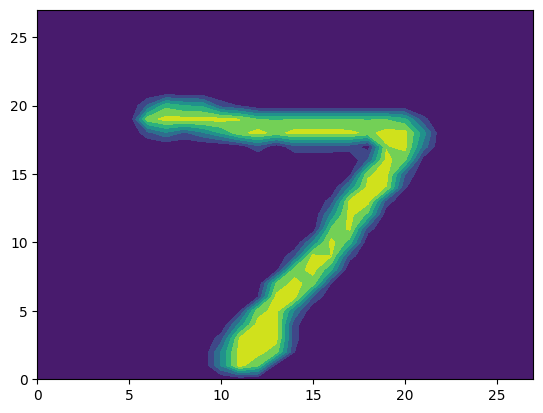

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

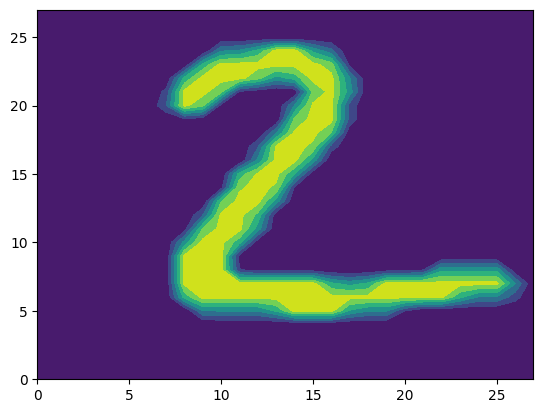

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

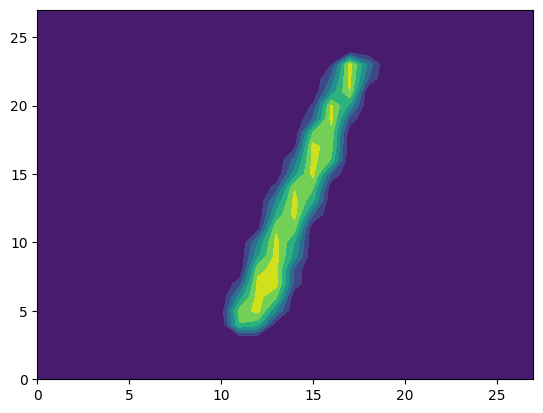

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

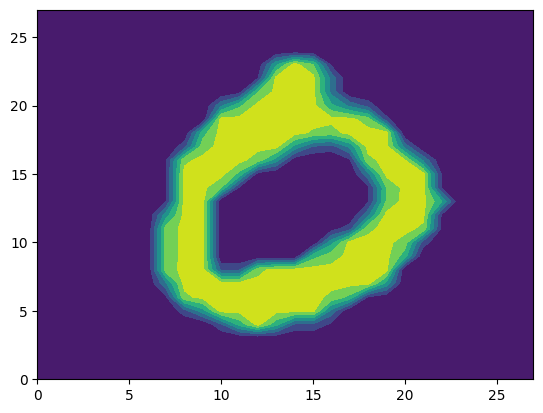

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

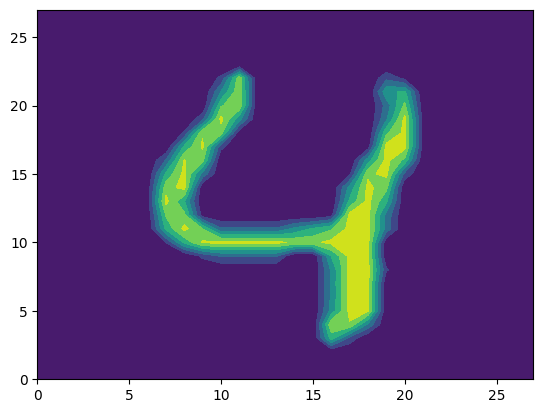

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

I find it interesting that you can see the outlines of the images themselves in the array of pixels. 

Each "pixel" does not seem to be RGB values though, which is what was confusing me at first. Otherwise, one pixel would be a vector with three values, not a single scalar value.  

In [6]:
# do you cast your dataframe 

#### question two 

In [7]:
# shape of X_train 
print(f"shape of X_train: {np.shape(X_train)}")
# shape of X_test
print(f"shape of X_test: {np.shape(X_test)}")
# x-train and x-test are our actual images mapped. 

shape of X_train: (60000, 28, 28)
shape of X_test: (10000, 28, 28)


In [8]:
# shape of X_train[i]
print(f"shape of X_train: {np.shape(X_train[0])}")
# shape of X_test[i]
print(f"shape of X_test: {np.shape(X_test[0])}")
# each "row" in our dataset is 28x28.
# that means one image is represented for each 'i', i think. 

shape of X_train: (28, 28)
shape of X_test: (28, 28)


In [9]:
# shape of y_train
print(f"shape of y_train: {np.shape(y_train)}")
# shape of y_test
print(f"shape of y_test: {np.shape(y_test)}")
# doesn't seem to be where our images are stored. then what are these? 
# labels? they've got only one dimension. 
# maybe it's the name of tne number an image represents, i.e. '7'

shape of y_train: (60000,)
shape of y_test: (10000,)


#### question three

In [10]:
# turning each image into a vector
# and putting those vectors into an array
Xtrain = []
for i in range(len(X_train)): 
    Xtrain.append(X_train[i].reshape((784))) # i can only turn this...
    # ...into a one dimensional list because sklearn wants only 2 dimensions
Xtrain = np.asarray(Xtrain)

In [11]:
# we need to do this for our test set as well. 
Xtest = []
for i in range(len(X_test)): 
    Xtest.append(X_test[i].reshape((784))) # i can only turn this...
    # ...into a one dimensional list because sklearn wants only 2 dimensions
Xtest = np.asarray(Xtest)

In [12]:
# double checking to see if everything worked
print(np.shape(Xtrain))
print(np.shape(Xtest))
# yup 

(60000, 784)
(10000, 784)


In [13]:
# seeing how it looks...
Xtrain[0] # yeah it appears that one row is a list with 784 entries 

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0,   0,   0,   0

#### question four

In [14]:
# import package for regressor 
from sklearn.neighbors import KNeighborsClassifier 

In [15]:
# kNN, copy and pasting code from kNN work. 
# what you really wanna do is calculate the number of correct divided by 
# number of classified. 
# gini index!
# calculate the accuracy score for multiple values of k. 

# fittedmodel.score(y_test) 


# crosstab -> np.trace -> divide by total N 
'''   
k_bar=10

SSE = [] # We'll store the SSE here 
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) 
    fitted_model = model.fit(Xtrain,y_train) 
    y_hat = fitted_model.predict(Xtest) 
    SSE.append(np.sum( (y_test-y_hat)**2 ))

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1 
print(k_star)
plt.plot(np.arange(1,k_bar+1),SSE,label='Test')

plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()
'''
# HUH WHY DOES IT GO UP

# chose to comment out all of the code because it takes so long to run and i don't want to re-run...
# ...it every time i reset the kernel. but yeah, this is what i used when i was trying to determine ideal k at...
# ...first. 
# you can re-run it if you so dare. 

'   \nk_bar=10\n\nSSE = [] # We\'ll store the SSE here \nfor k in range(k_bar):\n    model = KNeighborsClassifier(n_neighbors=k+1) \n    fitted_model = model.fit(Xtrain,y_train) \n    y_hat = fitted_model.predict(Xtest) \n    SSE.append(np.sum( (y_test-y_hat)**2 ))\n\nSSE_min = np.min(SSE)\nmin_index = np.where(SSE==SSE_min)\nk_star = min_index[0]+1 \nprint(k_star)\nplt.plot(np.arange(1,k_bar+1),SSE,label=\'Test\')\n\nplt.xlabel("k")\nplt.ylabel("SSE")\nplt.legend(loc=\'upper right\')\nplt.title(\'SSE\')\nplt.show()\n'

In [16]:
# one neighbour appears optimal from this chart, but i am afraid i'd...
# ...be overfitting. 
# for whatever reason, SSE steadily increases. 

# the ideal number of neighbours seemed to be k=1, but i am afraid we'd create a horrendously...
# ...overfit model. 

In [17]:
# thats it im going to create confusion matrices to see if best fit ACTUALLY...
# ...decreases
# importing tools 
from sklearn.metrics import confusion_matrix

In [18]:
# create confusion matrix 
model = KNeighborsClassifier(n_neighbors=4) 
fitted_model = model.fit(Xtrain,y_train) # Train the model on our data
y_hat = fitted_model.predict(Xtest)
confusion_matrix4 = confusion_matrix(y_test, y_hat)
confusion_matrix4
# this is when i have four neighbours 
# we will try with different number of neighbours and throw poo onto the wall til it sticks...
# ...to determine k. 
# we want the confusion matrix to apparently be less confused

array([[ 976,    1,    1,    0,    0,    1,    0,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  993,    1,    1,    0,    0,   16,    2,    0],
       [   0,    2,    5,  979,    1,   10,    1,    7,    2,    3],
       [   3,    9,    0,    0,  952,    0,    4,    1,    0,   13],
       [   4,    0,    0,   17,    2,  862,    5,    1,    0,    1],
       [   6,    3,    0,    0,    4,    3,  942,    0,    0,    0],
       [   0,   23,    5,    0,    5,    0,    0,  988,    0,    7],
       [   9,    3,    5,   16,    6,   19,    5,    5,  902,    4],
       [   4,    6,    3,    6,   13,    4,    1,   16,    1,  955]])

In [19]:
# seems like we got roughly what we wanted, but we can keep going for...
# ...smaller values 

In [20]:
# another one 
model = KNeighborsClassifier(n_neighbors=2) 
fitted_model = model.fit(Xtrain,y_train) # Train the model on our data
y_hat = fitted_model.predict(Xtest)
confusion_matrix2 = confusion_matrix(y_test, y_hat)
confusion_matrix2
# seems like our confusion matrix is actually more precise? 

array([[ 976,    1,    1,    0,    0,    1,    0,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,   10,  995,    1,    2,    0,    0,   12,    1,    0],
       [   1,    1,    8,  981,    1,    9,    0,    6,    2,    1],
       [   3,    7,    0,    0,  959,    0,    2,    3,    0,    8],
       [   6,    2,    0,   25,    2,  850,    2,    1,    1,    3],
       [   7,    3,    0,    0,    5,    4,  939,    0,    0,    0],
       [   0,   29,    8,    2,    3,    0,    0,  981,    0,    5],
       [  10,    2,    8,   28,    9,   29,    4,    5,  876,    3],
       [   6,    6,    3,    9,   19,    4,    1,   22,    2,  937]])

In [21]:
# another another one.
model = KNeighborsClassifier(n_neighbors=1) 
fitted_model = model.fit(Xtrain,y_train) # Train the model on our data
y_hat = fitted_model.predict(Xtest)
confusion_matrix1 = confusion_matrix(y_test, y_hat)
confusion_matrix1
# huh from a cursory glance a k-value of 1 indeed gives us our best confusion matrix
# computer vision is just a weird edge case in which one neighbour per point...
# ...actually works and it isn't just disgustingly overfit. 

# there are no magic rules to machine learning apparently. there are methods...
# ...that tend to work, but they will not be one hundred per cent on point...
# ...all the damn time. 

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1129,    3,    0,    1,    1,    1,    0,    0,    0],
       [   7,    6,  992,    5,    1,    0,    2,   16,    3,    0],
       [   0,    1,    2,  970,    1,   19,    0,    7,    7,    3],
       [   0,    7,    0,    0,  944,    0,    3,    5,    1,   22],
       [   1,    1,    0,   12,    2,  860,    5,    1,    6,    4],
       [   4,    2,    0,    0,    3,    5,  944,    0,    0,    0],
       [   0,   14,    6,    2,    4,    0,    0,  992,    0,   10],
       [   6,    1,    3,   14,    5,   13,    3,    4,  920,    5],
       [   2,    5,    1,    6,   10,    5,    1,   11,    1,  967]])

#### question five

In [22]:
# as requested by the question, let's show our confusion matrix...again
confusion_matrix1

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1129,    3,    0,    1,    1,    1,    0,    0,    0],
       [   7,    6,  992,    5,    1,    0,    2,   16,    3,    0],
       [   0,    1,    2,  970,    1,   19,    0,    7,    7,    3],
       [   0,    7,    0,    0,  944,    0,    3,    5,    1,   22],
       [   1,    1,    0,   12,    2,  860,    5,    1,    6,    4],
       [   4,    2,    0,    0,    3,    5,  944,    0,    0,    0],
       [   0,   14,    6,    2,    4,    0,    0,  992,    0,   10],
       [   6,    1,    3,   14,    5,   13,    3,    4,  920,    5],
       [   2,    5,    1,    6,   10,    5,    1,   11,    1,  967]])

In [23]:
# finding the accuracy 
numerator = np.trace(confusion_matrix1)
denominator = np.cumsum(confusion_matrix1[:,:])
denominator = denominator[-1]
print(numerator/denominator)
# EXTRAORDINARILY ACCURATE MODEL 

0.9691


In [24]:
# now i'm curious about the case with other models 
numerator2 = np.trace(confusion_matrix2)
denominator2 = np.cumsum(confusion_matrix2[:,:])
denominator2 = denominator2[-1]
print(numerator2/denominator2)
# less accurate but still EXTRAORDINARILY ACCURATE MODEL

0.9627


In [25]:
# again 
numerator4 = np.trace(confusion_matrix4)
denominator4 = np.cumsum(confusion_matrix4[:,:])
denominator4 = denominator4[-1]
print(numerator4/denominator4)
# less accurate than model 1 but still EXTRAORDINARILY ACCURATE MODEL 
# reflects the SSE graph well too, there was a trough at k=4 that was lower...
# ...than the one at k=2 but higher than the one at k=1

0.9682


When we have a k of 1 (i.e. we use 1 nearest neighbour's attributes to make predictions), our model was the MOST accurate. I went over it with the professor in office hours, but k=1 produces the most accuracy (and isn't direly underfit) because beyond the *first* nearest neighbour of a datapoint, subsequent nearest neighbours are more likely to belong to completely different classes. (I don't completely understand and honestly might come back to clarify because my train of thought sounds wrong) 

#### question six

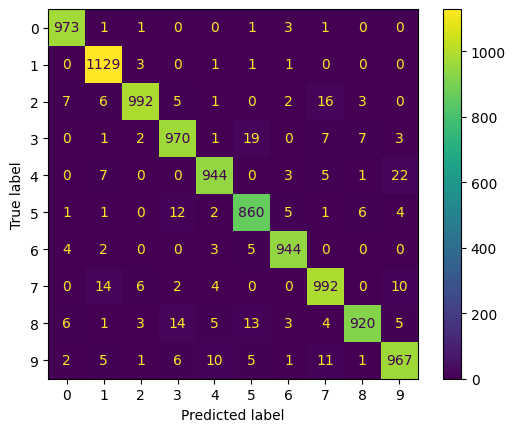

In [26]:
# printing confusion matrix AGAIN but making it a heatmap this time...
# ...so i can more easily discern patterns. 
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1)

cm_display.plot()
plt.show()
# that didnt help me let's try something else

In [27]:
# i have an idea
# this line of code is from chatgpt. 
np.fill_diagonal(confusion_matrix1, np.diag(confusion_matrix1) - 900)
confusion_matrix1

array([[ 73,   1,   1,   0,   0,   1,   3,   1,   0,   0],
       [  0, 229,   3,   0,   1,   1,   1,   0,   0,   0],
       [  7,   6,  92,   5,   1,   0,   2,  16,   3,   0],
       [  0,   1,   2,  70,   1,  19,   0,   7,   7,   3],
       [  0,   7,   0,   0,  44,   0,   3,   5,   1,  22],
       [  1,   1,   0,  12,   2, -40,   5,   1,   6,   4],
       [  4,   2,   0,   0,   3,   5,  44,   0,   0,   0],
       [  0,  14,   6,   2,   4,   0,   0,  92,   0,  10],
       [  6,   1,   3,  14,   5,  13,   3,   4,  20,   5],
       [  2,   5,   1,   6,  10,   5,   1,  11,   1,  67]])

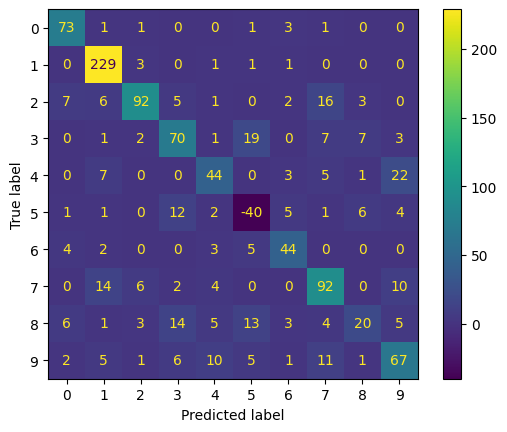

In [29]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1)

cm_display.plot()
plt.show()

It seems ever so slightly likelier that our images will be misclassified if they are not of zeroes or ones. I assume that the patterns arise because of visual distinctness (or lack thereof) between numbers; for example, it seems like twenty-two '4's got misclassified as '9's, and I could see how 4 and 9 could look similar to a computer. Thirteen '8's were misclassified as '5's and sixteen '2's were misclassified as '7's for likely the same reason. Meanwhile, the numbers '0' and '1' do not look like other numbers (unless your handwriting sucks). 

#### question seven 

Everyone took all the good ideas: 
- We already have ways of representing RGB with matrices.
- There are probably already ways of representing hue, value, and chroma with matrices, and it probably looks almost identical to RGB (i.e. little vectors with three values of up to 255 that each represent a pixel). I would be incredibly surprised if there wasn't. 
- Maybe I could choose a number more intuitive than 255 to work with for levels of colour intensity, like 300. But we work with the number '255' because the fact that colours are encoded with 8-bit values.
  - One bit can be 0 or 1, which means we have two options for values there. If we have 8 bits, we have 2^8 options for values.
- Hexadecimal is literally just RGB but more confusing (idk im not a computer its not super interpretable to me) 

Because the *good* ideas are stolen, I wish to propose a *terrible* idea that is probably horribly unintuitive to the computer: 
- Each 'pixel' will include a single value that corresponds to the colour's wavelength in nanometres.
- Because each pixel is a scalar value (and not a vector with multiple values like with RGB), each image can be represented as a *two-dimensional matrix.*
- "How do you convert it to tabular data?!" `pd.DataFrame(colour_matrix)` lol
  - well...this is for one image
- For converting multiple images into tabular data: flatten each matrix (i.e. image) like we did in the problem, and then each of the resultant vectors can be rows in an all-NEW dataframe. 
- I acknowledge that my "novel methods" of representing colours in image will not work in practise because a computer cannot understand "oh, if it's an electromagnetic wave with a 700nm wavelength it's probably red" like a human can. It's not like we have easily-computable 8-bit-values-translatable-to-colours that RGB has. 